# One Shot Learning with Siamese Networks

This is the jupyter notebook that accompanies

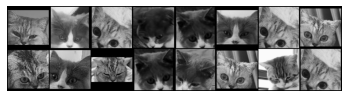

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]]
Epoch number 0
 Current loss 2.033714532852173

Epoch number 1
 Current loss 41.203521728515625

Epoch number 2
 Current loss 52.267303466796875

Epoch number 3
 Current loss 28.59955406188965

Epoch number 4
 Current loss 24.202775955200195

Epoch number 5
 Current loss 29.96941566467285

Epoch number 6
 Current loss 35.905460357666016

Epoch number 7
 Current loss 34.58606719970703

Epoch number 8
 Current loss 26.426677703857422

Epoch number 9
 Current loss 44.95232009887695

Epoch number 10
 Current loss 23.69464683532715

Epoch number 11
 Current loss 22.096954345703125

Epoch number 12
 Current loss 38.45426559448242

Epoch number 13
 Current loss 23.63082504272461

Epoch number 14
 Current loss 8.714187622070312

Epoch number 15
 Current loss 17.766721725463867

Epoch number 16
 Current loss 51.66191864013672

Epoch number 17
 Current loss 15.147488594055176

Epoch number 18
 Current loss 19.305767059326172

Epoch number 19
 Curr

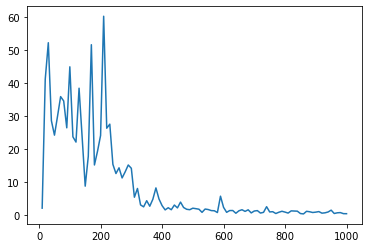

In [ ]:

from SiameseNetworkDataset import SiameseNetworkDataset
from config import Config
from contrastiveLoss import ContrastiveLoss
from siameset import SiameseNetwork
from Util import *



   

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()



folder_dataset = dset.ImageFolder(root=Config.training_dir+"/cat")

siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset,
                                        transform=transforms.Compose([transforms.Resize((100,100)),
                                                                      transforms.ToTensor()
                                                                      ])
                                       ,should_invert=False)

vis_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=0,
                        batch_size=8)
dataiter = iter(vis_dataloader)


example_batch = next(dataiter)
concatenated = torch.cat((example_batch[0],example_batch[1]),0)
imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy())



train_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=0,
                        batch_size=Config.train_batch_size)              

net = SiameseNetwork()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(),lr = 0.0005 )                        


counter = []
loss_history = [] 
iteration_number= 0


for epoch in range(0,Config.train_number_epochs):
    for i, data in enumerate(train_dataloader,0):
        img0, img1 , label = data
        img0, img1 , label = img0, img1 , label
        optimizer.zero_grad()
        output1,output2 = net(img0,img1)
        loss_contrastive = criterion(output1,output2,label)
        loss_contrastive.backward()
        optimizer.step()
        if i %10 == 0 :
            print("Epoch number {}\n Current loss {}\n".format(epoch,loss_contrastive.item()))
            iteration_number +=10
            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())
show_plot(counter,loss_history)

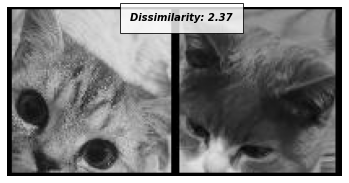

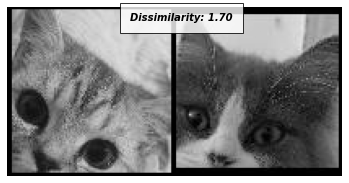

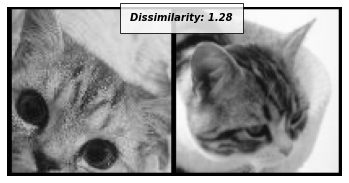

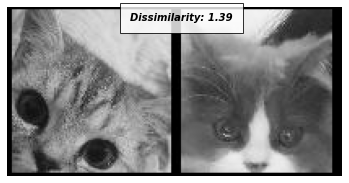

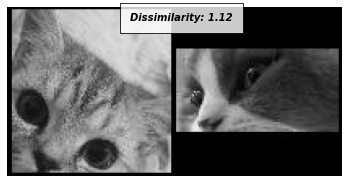

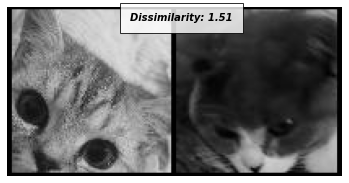

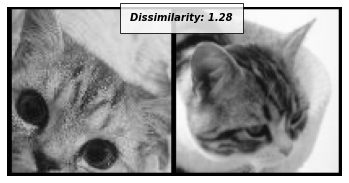

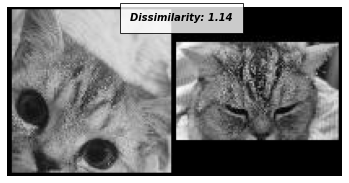

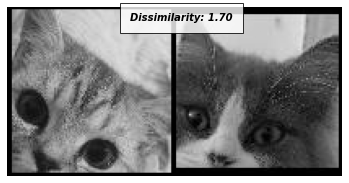

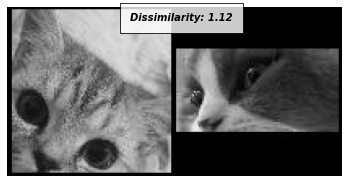

In [28]:

folder_dataset_test = dset.ImageFolder(root=Config.testing_dir+"/cat")
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset_test,
                                        transform=transforms.Compose([transforms.Resize((100,100)),
                                                                      transforms.ToTensor()
                                                                      ])
                                       ,should_invert=False)

test_dataloader = DataLoader(siamese_dataset,num_workers=0,batch_size=1,shuffle=True)
dataiter = iter(test_dataloader)
x0,_,_ = next(dataiter)

for i in range(10):
    _,x1,label2 = next(dataiter)
    concatenated = torch.cat((x0,x1),0)
    
    output1,output2 = net(Variable(x0),Variable(x1))
    euclidean_distance = F.pairwise_distance(output1, output2)
    imshow(torchvision.utils.make_grid(concatenated),'Dissimilarity: {:.2f}'.format(euclidean_distance.item()))